In [15]:
import requests

#Fetching recent stories
def fetch_top_stories(api_key, section='food'):
#HTTP request
    url = f'https://api.nytimes.com/svc/topstories/v2/{section}.json'
    params = {'api-key': api_key}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data.get('results', [])
    else:
        print("Failed to fetch top stories:", response.text)
        return []

#Plugging in API 
api_key = 'API_KEY'
section = 'food' #The specific section to focus on
top_stories = fetch_top_stories(api_key, section)
print(f"Fetched {len(top_stories)} top stories from the {section} section.")


Fetched 39 top stories from the food section.


In [55]:
import requests
import pandas as pd
from datetime import datetime, timedelta

#Fetching recent stories
def fetch_archive_data(api_key, year, month, section='food'):
    url = f'https://api.nytimes.com/svc/archive/v1/{year}/{month}.json'
    params = {'api-key': api_key}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        articles = []
        for article in data['response']['docs']:
            if 'headline' in article and 'main' in article['headline'] and 'pub_date' in article and 'section_name' in article:
                if article['section_name'].lower() == section.lower():
                    headline = article['headline']['main']
                    pub_date = pd.to_datetime(article['pub_date'])
                    articles.append({'Headline': headline, 'Publication Date': pub_date})
        return pd.DataFrame(articles)
    else:
        print("Failed to fetch archive data:", response.text)
        return pd.DataFrame()

def analyze_keyword_frequency(df):
    all_headlines = ' '.join(df['Headline'])
    words = all_headlines.split()
    # Count the occurrence of each word
    word_counts = {}
    for word in words:
        word_counts[word] = word_counts.get(word, 0) + 1
    
    return word_counts

#Fetch data. Look at data from different months.
def main():
    api_key = 'API_KEY'
    year = 2024
    month = 1
    section = 'food'
    df = fetch_archive_data(api_key, year, month, section)
    
    if not df.empty:
        print("Data extracted successfully:")
        print(df)
        
        # Analyze the frequency of words over time
        word_frequency = analyze_keyword_frequency(df)
        print("\nWord Frequency:")
        print(word_frequency)
    else:
        print("No articles fetched.")

if __name__ == "__main__":
    main()


Data extracted successfully:
                                             Headline  \
0   Making a Cooking Resolution? These 9 Recipes W...   
1   Lemony White Bean Soup With Turkey and Greens ...   
2   The Chef Junghyun Park Dives Deep in ‘The Kore...   
3        Five Flavorful Recipes to Reboot and Refresh   
4   Frenchette Bakery at the Whitney Museum Expand...   
..                                                ...   
77  Skip the Flowers for a Sweethearts Cake From N...   
78                              Breakfast for Dinner!   
79  The Patty Melt Is Tired of Hearing About Your ...   
80  Red Sorghum Brings Vintage Chinese Glamour to ...   
81  Lively and Elegant and Not at All Dry Chicken ...   

            Publication Date  
0  2024-01-01 10:01:01+00:00  
1  2024-01-01 16:00:02+00:00  
2  2024-01-02 10:01:12+00:00  
3  2024-01-02 16:00:02+00:00  
4  2024-01-02 16:00:55+00:00  
..                       ...  
77 2024-01-29 21:20:56+00:00  
78 2024-01-30 16:00:24+00:00  
79 2024

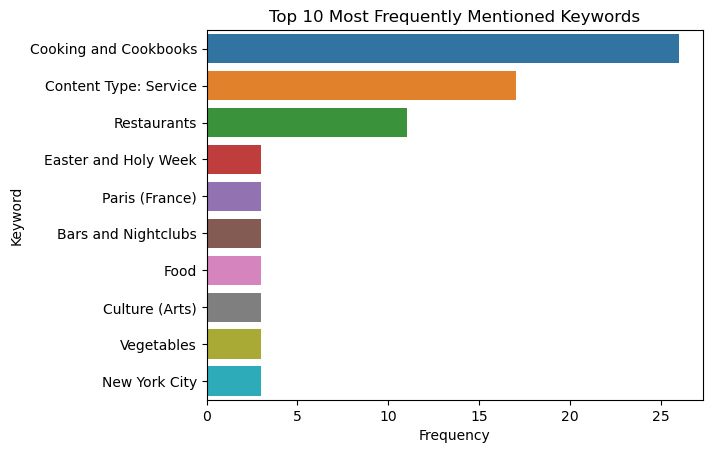

In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#Fetching the recent stories
def fetch_top_stories(api_key, section='food'):
    url = f'https://api.nytimes.com/svc/topstories/v2/{section}.json'
    params = {'api-key': api_key}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data.get('results', [])
    else:
        print("Failed to fetch top stories:", response.text)
        return []

#Extracting keywords like places, content, names etc.
def extract_keywords(top_stories):
    keywords = []
    for article in top_stories:
        des_facet = article.get('des_facet', [])
        org_facet = article.get('org_facet', [])
        per_facet = article.get('per_facet', [])
        geo_facet = article.get('geo_facet', [])
        # Combine all keywords into a single list
        article_keywords = des_facet + org_facet + per_facet + geo_facet
        keywords.extend(article_keywords)
    return keywords

#There was a dataset with the keyword "internal-sub-only-nl". I couldn't find out what it was so I replaced it with another data set.
def analyze_keyword_frequency(keywords):
    keyword_counter = Counter(keyword for keyword in keywords if keyword != 'internal-sub-only-nl')
    return keyword_counter

#What the graph looks like. Placing the Y and X axis
def plot_keyword_frequency(keyword_counter):
    df = pd.DataFrame(list(keyword_counter.items()), columns=['Keyword', 'Frequency'])
    df = df.sort_values(by='Frequency', ascending=False).head(10)  # Top 10 keywords
    sns.barplot(x='Frequency', y='Keyword', data=df)
    plt.title('Top 10 Most Frequently Mentioned Keywords')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.show()

def main():
    api_key = 'API_KEY'
    section = 'food'
    top_stories = fetch_top_stories(api_key, section)
    
    if top_stories:
        keywords = extract_keywords(top_stories)
        keyword_counter = analyze_keyword_frequency(keywords)
        plot_keyword_frequency(keyword_counter)
    else:
        print("No top stories fetched.")

if __name__ == "__main__":
    main()

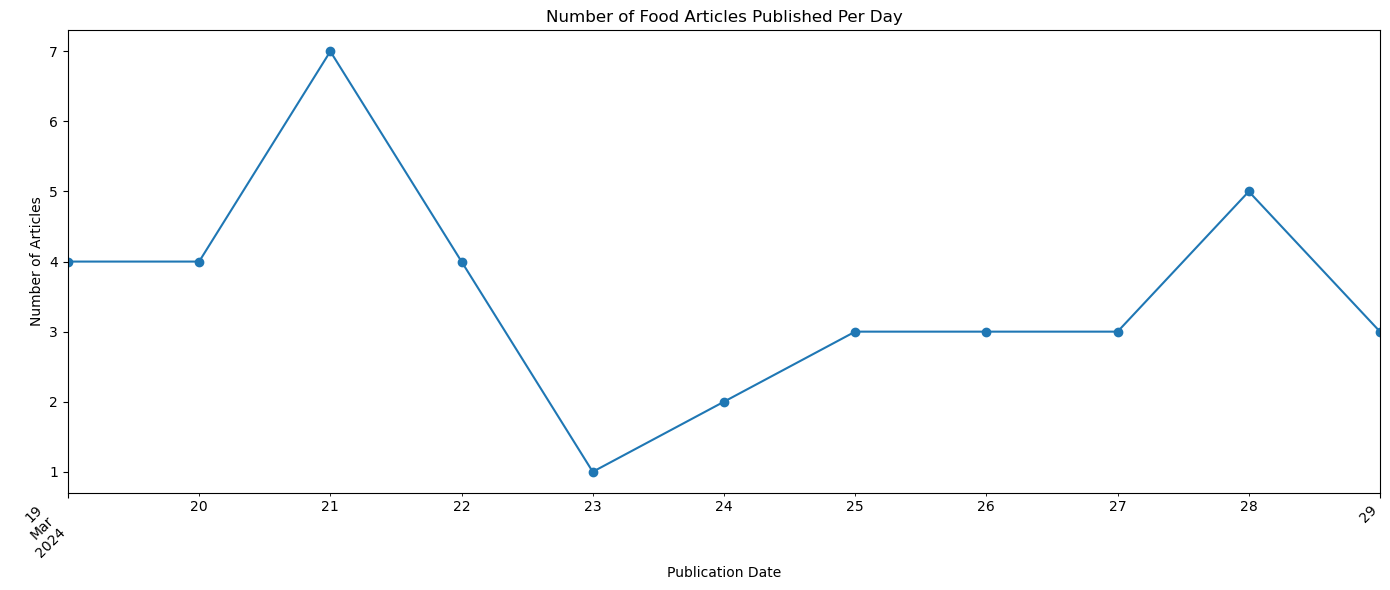

In [56]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Fetching recent stories
def fetch_top_stories(api_key, section='food'):
    url = f'https://api.nytimes.com/svc/topstories/v2/{section}.json'
    params = {'api-key': api_key}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data.get('results', [])
    else:
        print("Failed to fetch top stories:", response.text)
        return []

# Extracting keywords and publication dates
def extract_data(top_stories):
    publication_dates = []
    keywords = []
    
#Extracting keywords like places, content, names etc.
    for article in top_stories:
        publication_dates.append(pd.to_datetime(article.get('published_date')))  # Convert to datetime object
        
        des_facet = article.get('des_facet', [])
        org_facet = article.get('org_facet', [])
        per_facet = article.get('per_facet', [])
        geo_facet = article.get('geo_facet', [])
        
        # Combining all keywords into a single list
        article_keywords = des_facet + org_facet + per_facet + geo_facet
        keywords.append(','.join(article_keywords))

    return {'Publication Date': publication_dates, 'Keywords': keywords}

# Plotting number of articles published over time
def plot_article_counts_over_time(df, period='day'):
    if period == 'day':
        df['Publication Date'] = pd.to_datetime(df['Publication Date']).dt.tz_localize(None).dt.to_period('D')  # Timezone convert to daily period
        title = 'Number of Food Articles Published Per Day'
    elif period == 'week':
        df['Publication Date'] = pd.to_datetime(df['Publication Date']).dt.tz_localize(None).dt.to_period('W')  # Timezone convert to weekly period
        title = 'Number of Articles Published Per Week'

    #Chart Plotting thingy
    article_counts_over_time = df['Publication Date'].value_counts().sort_index()
    plt.figure(figsize=(14, 6))  
    article_counts_over_time.plot(kind='line', marker='o', title=title)
    plt.xlabel('Publication Date')
    plt.ylabel('Number of Articles')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout()  
    plt.show()


def main():
    api_key = 'API_KEY'
    section = 'food'
    top_stories = fetch_top_stories(api_key, section)
    
    if top_stories:
        data = extract_data(top_stories)
        df = pd.DataFrame(data)
        plot_article_counts_over_time(df, period='day')  # Plot daily article counts
        
    else:
        print("No top stories fetched.")

if __name__ == "__main__":
    main()
